In [130]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
print("done")

done


In [131]:
df = pd.read_csv( 'AAPL (1).csv')
df.head(5), df.shape

(         Date       Open       High        Low      Close  Adj Close    Volume
 0  2018-05-18  46.797501  46.952499  46.532501  46.577499  44.512959  73190800
 1  2018-05-21  47.000000  47.317501  46.727501  46.907501  44.828346  73603200
 2  2018-05-22  47.095001  47.220001  46.695000  46.790001  44.716049  60962800
 3  2018-05-23  46.587502  47.125000  46.439999  47.090000  45.002750  80233600
 4  2018-05-24  47.192501  47.209999  46.552502  47.037498  44.952572  92936000,
 (1258, 7))

In [132]:
df.drop('Adj Close', axis=1, inplace= True)
df.head(5)

,Date,Open,High,Low,Close,Volume
0,2018-05-18,46.797501,46.952499,46.532501,46.577499,73190800
1,2018-05-21,47.000000,47.317501,46.727501,46.907501,73603200
2,2018-05-22,47.095001,47.220001,46.695000,46.790001,60962800
3,2018-05-23,46.587502,47.125000,46.439999,47.090000,80233600
4,2018-05-24,47.192501,47.209999,46.552502,47.037498,92936000


In [133]:
dates = df['Date'] 

In [134]:
df.drop('Date', axis=1, inplace = True)
df.head(5)

,Open,High,Low,Close,Volume
0,46.797501,46.952499,46.532501,46.577499,73190800
1,47.000000,47.317501,46.727501,46.907501,73603200
2,47.095001,47.220001,46.695000,46.790001,60962800
3,46.587502,47.125000,46.439999,47.090000,80233600
4,47.192501,47.209999,46.552502,47.037498,92936000


<Axes: >

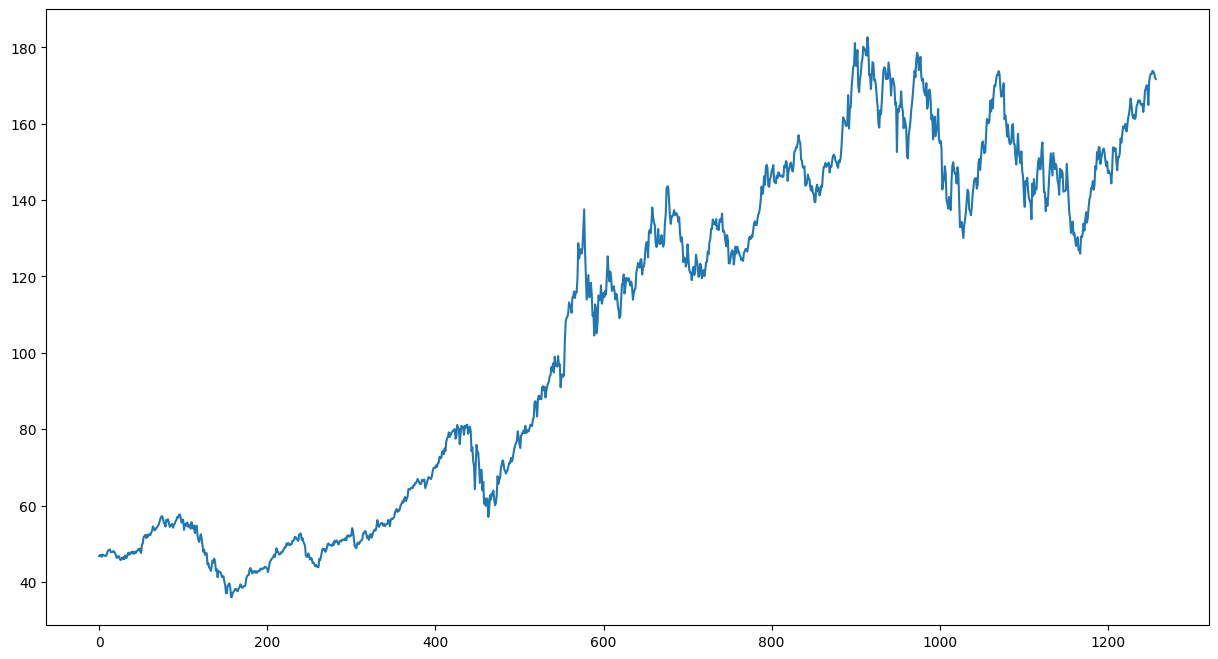

In [135]:
df['Open'].plot(figsize=(15,8))

In [136]:
data = df[:].astype(float)
type(data) , data.shape , data.head()

(pandas.core.frame.DataFrame,
 (1258, 5),
         Open       High        Low      Close      Volume
 0  46.797501  46.952499  46.532501  46.577499  73190800.0
 1  47.000000  47.317501  46.727501  46.907501  73603200.0
 2  47.095001  47.220001  46.695000  46.790001  60962800.0
 3  46.587502  47.125000  46.439999  47.090000  80233600.0
 4  47.192501  47.209999  46.552502  47.037498  92936000.0)

In [137]:
x=data[['Open','High','Low','Volume']]
x

,Open,High,Low,Volume
0,46.797501,46.952499,46.532501,73190800.0
1,47.000000,47.317501,46.727501,73603200.0
2,47.095001,47.220001,46.695000,60962800.0
3,46.587502,47.125000,46.439999,80233600.0
4,47.192501,47.209999,46.552502,92936000.0
...,...,...,...,...
1253,173.850006,174.589996,172.169998,49514700.0
1254,173.619995,174.059998,171.000000,45497800.0
1255,173.160004,173.210007,171.470001,37266700.0
1256,171.990005,173.139999,171.800003,42110300.0


In [138]:
y=data[['Close']]
y

,Close
0,46.577499
1,46.907501
2,46.790001
3,47.090000
4,47.037498
...,...
1253,173.750000
1254,172.570007
1255,172.070007
1256,172.070007


In [139]:
df

,Open,High,Low,Close,Volume
0,46.797501,46.952499,46.532501,46.577499,73190800
1,47.000000,47.317501,46.727501,46.907501,73603200
2,47.095001,47.220001,46.695000,46.790001,60962800
3,46.587502,47.125000,46.439999,47.090000,80233600
4,47.192501,47.209999,46.552502,47.037498,92936000
...,...,...,...,...,...
1253,173.850006,174.589996,172.169998,173.750000,49514700
1254,173.619995,174.059998,171.000000,172.570007,45497800
1255,173.160004,173.210007,171.470001,172.070007,37266700
1256,171.990005,173.139999,171.800003,172.070007,42110300


                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.726e+05
Date:                Mon, 14 Aug 2023   Prob (F-statistic):               0.00
Time:                        00:46:38   Log-Likelihood:                -1167.5
No. Observations:                1004   AIC:                             2361.
Df Residuals:                     991   BIC:                             2425.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1997      0.130      1.540   

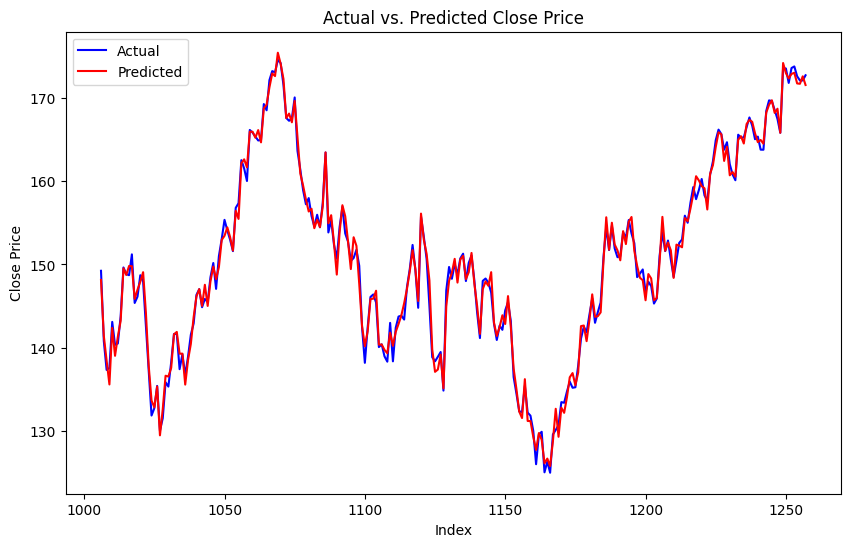

Mean Squared Error on test data: 0.9165419637158659


In [140]:
lag_order = 2

for i in range(1, lag_order + 1):
    data[f'Close_Lag_{i}'] = data['Close'].shift(i)
    data[f'Open_Lag_{i}'] = data['Open'].shift(i)
    data[f'High_Lag_{i}'] = data['High'].shift(i)
    data[f'Low_Lag_{i}'] = data['Low'].shift(i)
    data[f'Volume_Lag_{i}'] = data['Volume'].shift(i)

data.dropna(inplace=True)

train_size = 0.8  
train_data, test_data = train_test_split(data, train_size=train_size, shuffle=False)

X_train = train_data[['Open'] + [f'Open_Lag_{i}' for i in range(1, lag_order + 1)] + ['High'] + [f'High_Lag_{i}' for i in range(1, lag_order + 1)] + ['Low'] + [f'Low_Lag_{i}' for i in range(1, lag_order + 1)] + ['Volume'] + [f'Volume_Lag_{i}' for i in range(1, lag_order + 1)]]
y_train = train_data['Close']

X_train = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train)
ardl_results = model.fit()

print(ardl_results.summary())

X_test = test_data[['Open'] + [f'Open_Lag_{i}' for i in range(1, lag_order + 1)] +
                   ['High'] + [f'High_Lag_{i}' for i in range(1, lag_order + 1)] +
                   ['Low'] + [f'Low_Lag_{i}' for i in range(1, lag_order + 1)] +
                   ['Volume'] + [f'Volume_Lag_{i}' for i in range(1, lag_order + 1)]]
y_test = test_data['Close']

X_test = sm.add_constant(X_test)

y_pred = ardl_results.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(test_data.index, y_test, label='Actual', color='blue')
plt.plot(test_data.index, y_pred, label='Predicted', color='red')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.title('Actual vs. Predicted Close Price')
plt.legend()
plt.show()

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on test data: {mse}")